In [2]:
import ciw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lamda: Cuántas llamadas tengo por hora? Eran 20 llamadas por hora<br>
Mu: Cada cuanto tiempo atiendo un cliente? Si atiendo 7 clientes por hora, atiendo un cliente cada 1/7 horas <br>
S: Cuántos representantes tengo? En el primer caso 3, en el segundo 4. 

In [4]:
mu = 7
lamda = 20
S = 4

tiempo_de_simulacion = 1000

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000.0/1000 [00:00<00:00, 1356.88it/s]           


,id_number,server_id,arrival_date,waiting_time,service_time,exit_date,queue_size_at_departure
0,2,2,0.079363,0.000000,0.042066,0.121429,2
1,5,4,0.171213,0.000000,0.004108,0.175321,3
2,3,3,0.113566,0.000000,0.085273,0.198839,2
3,1,1,0.007215,0.000000,0.268594,0.275808,2
4,7,1,0.333369,0.000000,0.000301,0.333670,2
...,...,...,...,...,...,...,...
19868,19871,2,999.478255,0.213461,0.025083,999.716798,4
19869,19872,1,999.491786,0.219274,0.086217,999.797277,4
19870,19862,4,998.899349,0.337826,0.571857,999.809032,3
19871,19873,2,999.500399,0.216399,0.132325,999.849123,3


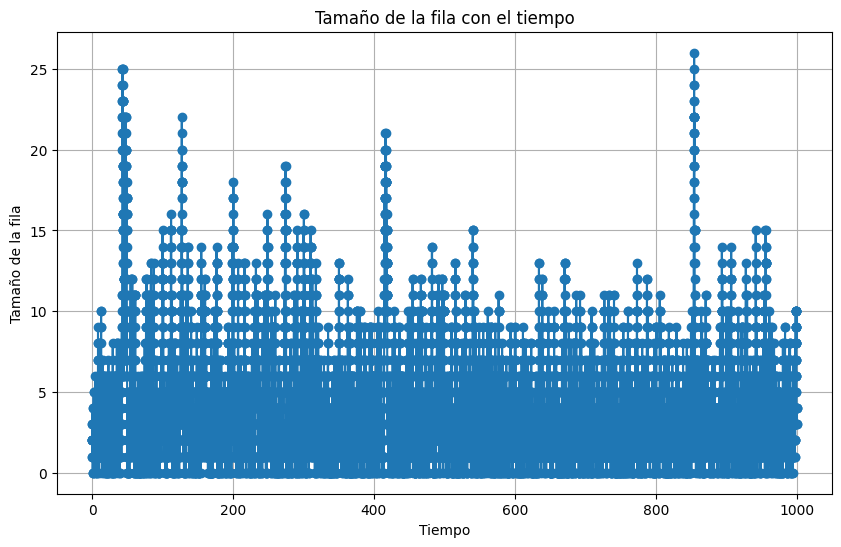

In [5]:
# Define los parámetros de la red
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=lamda)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[S]
)

# Inicializa la simulación
ciw.seed(1)
Q = ciw.Simulation(N, tracker= ciw.trackers.SystemPopulation())

# Ejecuta la simulación
Q.simulate_until_max_time(tiempo_de_simulacion, progress_bar=True)

# Obtiene los registros de la simulación
data = Q.get_all_records()

# Crea un DataFrame de Pandas
df = pd.DataFrame(data)

# Muestra el DataFrame
display(df[['id_number', 'server_id', 'arrival_date', 'waiting_time', 'service_time', 'exit_date', 'queue_size_at_departure']])

# Ordena las fechas de salida en orden ascendente
df = df.sort_values(by='exit_date')

# Crea un nuevo gráfico
plt.figure(figsize=(10,6))

# Dibuja una línea que muestre el tamaño de la fila en función del tiempo
plt.plot(df['exit_date'], df['queue_size_at_departure'], marker='o')

# Añade etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la fila')
plt.title('Tamaño de la fila con el tiempo')

# Muestra el gráfico
plt.grid(True)
plt.show()



Para calcular bien los resultados, no tenemos en cuenta la primera parte (cuando empieza a llegar la gente), ni cuando termina (ya que ciw no contempla los clientes que no terminaron el servicio en el momento que corta la simulación)

In [6]:
df = df.loc[(df['arrival_date']>tiempo_de_simulacion * 0.1) & (df['arrival_date']<tiempo_de_simulacion * 0.9)]

In [7]:
capacidad = S*mu

utilizacion = (lamda) / (mu * S)

Wq = df['waiting_time'].mean()

Ws = (df['waiting_time'] + df['service_time']).mean()

Lq = df['queue_size_at_arrival'].mean()

Ls = np.mean([row[1] for row in Q.statetracker.history])
Ls_teorico = Ws * lamda

probabilidad_sistema_vacio = np.mean([row[1]==0for row in Q.statetracker.history])

probabilidad_espera = (df['waiting_time'] > 0).mean()

In [8]:
print(f'Capacidad del sistema: {capacidad} clientes por hora')
print(f'Utilización teórica: {utilizacion:.2%}')
print(f'Utilización empírica: {Q.transitive_nodes[0].server_utilisation:.2%}')
print(f'Número promedio de clientes en cola: {Lq:.2f}')
print(f'Número promedio de clientes en el sistema: {Ls:.2f} (Teórico: {Ls_teorico:.2f})')
print(f'Tiempo promedio en cola: {Wq:.2f} horas')
print(f'Tiempo promedio en el sistema: {Ws:.2f} horas')
print(f'Probabilidad de que el sistema esté vacío: {probabilidad_sistema_vacio:.2%}')
print(f'Probabilidad de que un cliente tenga que esperar: {probabilidad_espera:.2%}')

Capacidad del sistema: 28 clientes por hora
Utilización teórica: 71.43%
Utilización empírica: 71.00%
Número promedio de clientes en cola: 3.86
Número promedio de clientes en el sistema: 4.44 (Teórico: 3.90)
Tiempo promedio en cola: 0.05 horas
Tiempo promedio en el sistema: 0.20 horas
Probabilidad de que el sistema esté vacío: 2.36%
Probabilidad de que un cliente tenga que esperar: 44.02%
